In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn
%matplotlib inline


## Importing the Data

In [40]:
consumer_complaints = pd.read_csv('complaints_dec_2014.csv')

### A sample of the data:

In [41]:
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


## Resolving Date and Timestamp Issues

In [42]:
date_series = consumer_complaints.pop('Date received')

In [43]:
consumer_complaints.index = pd.to_datetime(date_series, format='%m/%d/%Y')

In [44]:
consumer_complaints['Weekday'] = consumer_complaints.index.weekday

## Number of Complaints by Company

In [45]:
complaint_and_company = consumer_complaints[['Complaint ID', 'Company']]
                    

In [46]:
sorted_complaint_and_company = complaint_and_company.sort_values(by='Company')

In [47]:
popped_companies = sorted_complaint_and_company.pop('Company')

In [48]:
graph_values = popped_companies.value_counts().head(10)

In [49]:
graph_values

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
Name: Company, dtype: int64

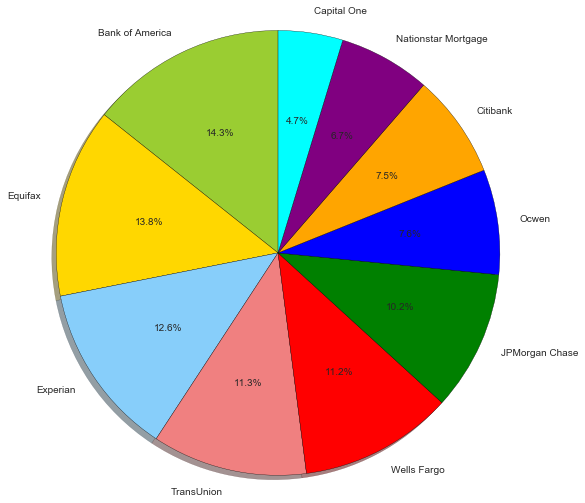

In [50]:
labels = 'Bank of America', 'Equifax', 'Experian', 'TransUnion', 'Wells Fargo', 'JPMorgan Chase', 'Ocwen', 'Citibank', 'Nationstar Mortgage', 'Capital One'
sizes = [766, 737, 675, 604, 598, 545, 408, 403, 357, 252]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'green', 'blue', 'orange', 'purple', 'aqua']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

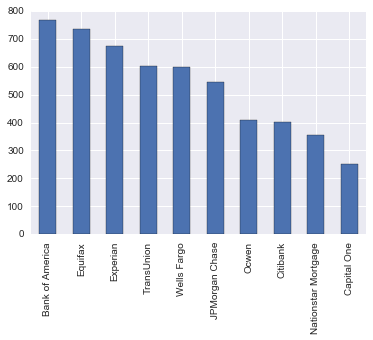

In [51]:
graph_values.plot.bar()

## Number of Complaints by Product

In [52]:
complaint_and_product = consumer_complaints[['Complaint ID', 'Product']]

In [53]:
sorted_complaint_and_product = complaint_and_product.sort_values(by='Product')

In [54]:
popped_products = sorted_complaint_and_product.pop('Product')

In [55]:
values_for_graph = popped_products.value_counts()

In [56]:
values_for_graph

Mortgage                   3002
Debt collection            2942
Credit reporting           2113
Bank account or service    1136
Credit card                1100
Consumer loan               578
Student loan                340
Payday loan                 141
Money transfers             107
Prepaid card                 70
Other financial service      14
Name: Product, dtype: int64

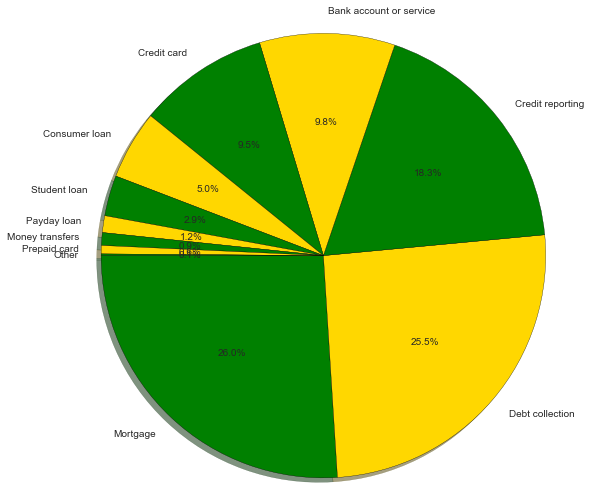

In [57]:
labels = 'Mortgage', 'Debt collection', 'Credit reporting', 'Bank account or service', 'Credit card', 'Consumer loan', 'Student loan', 'Payday loan', 'Money transfers', 'Prepaid card', 'Other'
sizes = [3002, 2942, 2113, 1136, 1100, 578, 340, 141, 107, 70, 14]
colors = ['green', 'gold']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

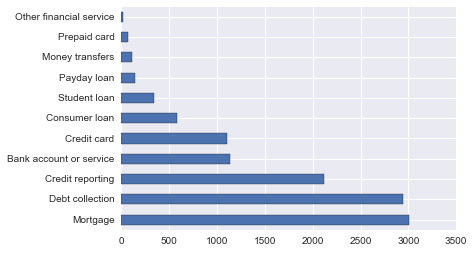

In [58]:
values_for_graph.plot.barh()

## Number of Complaints by Company Response

In [59]:
complaint_and_response = consumer_complaints[['Complaint ID', 'Company response']]

In [60]:
sorted_complaint_and_response = complaint_and_response.sort_values(by='Company response')

In [61]:
popped_response = sorted_complaint_and_response.pop('Company response')

In [62]:
g_values = popped_response.value_counts()

In [63]:
g_values

Closed with explanation            8185
Closed with non-monetary relief    1253
In progress                        1056
Closed with monetary relief         643
Closed                              239
Untimely response                   167
Name: Company response, dtype: int64

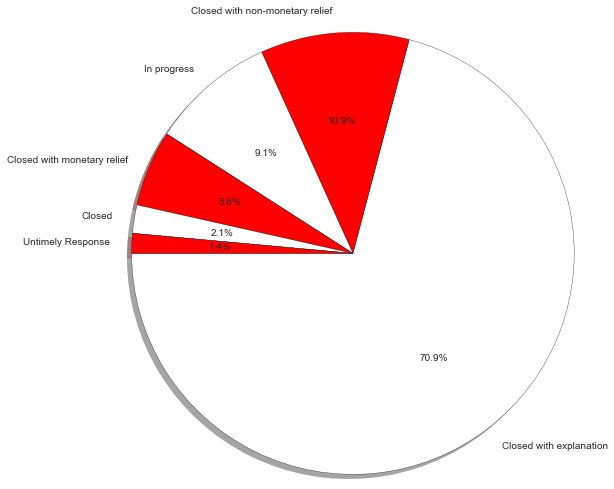

In [64]:
labels = 'Closed with explanation', 'Closed with non-monetary relief', 'In progress', 'Closed with monetary relief', 'Closed', 'Untimely Response'
sizes = [8185, 1253, 1056, 643, 239, 167]
colors = ['white', 'red']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

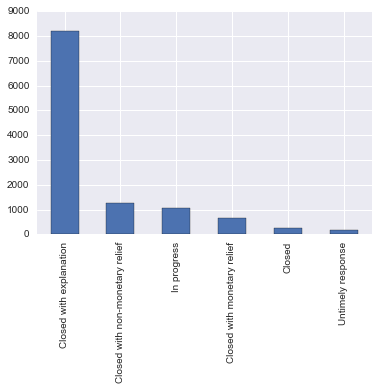

In [65]:
g_values.plot.bar()

## Mean Number of Complaints by Day of the Week

In [66]:
complaint_and_day = consumer_complaints[['Complaint ID', 'Weekday']]

In [67]:
sorted_complaint_and_day = complaint_and_day.sort_values(by='Weekday')

In [68]:
popped_weekday = sorted_complaint_and_day.pop('Weekday')

In [69]:
graph_vs = popped_weekday.value_counts('mean')

In [70]:
graph_vs

1    0.223512
0    0.220393
2    0.198302
3    0.141558
4    0.125271
5    0.047041
6    0.043923
Name: Weekday, dtype: float64

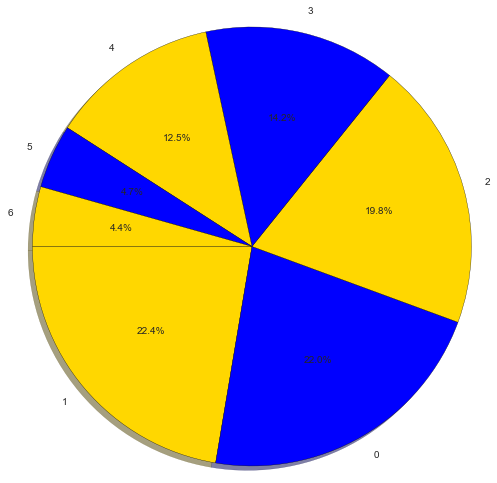

In [71]:
labels = '1', '0', '2', '3', '4', '5', '6'
sizes = [0.223512, 0.220393, 0.198302, 0.141558, 0.125271, 0.047041, 0.043923]
colors = ['gold', 'blue',]

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

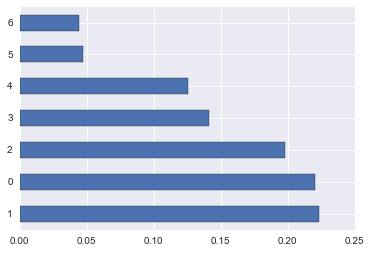

In [72]:
graph_vs.plot.barh()

## Number of Complaints by State

In [73]:
complaint_and_state = consumer_complaints[['Complaint ID', 'State']]

In [74]:
sorted_complaint_and_state = complaint_and_state.sort_values(by='State')

In [75]:
popped_state = sorted_complaint_and_state.pop('State')

In [78]:
graphy_data = popped_state.value_counts('mean')

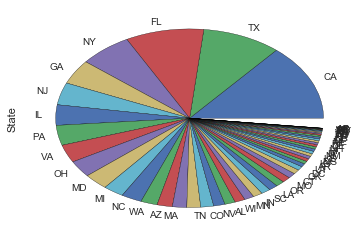

In [80]:
graphy_data.plot.pie()